In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# Load dataset
hr_data = pd.read_csv('HR_DATASET.csv')

In [3]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr_data.shape

(917, 35)

In [5]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,917.000000,917.000000,917.000000,917.000000,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,...,917.000000,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,36.938931,785.711014,9.294438,2.921483,1.0,1413.466739,2.738277,66.231189,2.721919,2.044711,...,2.637950,80.0,0.821156,11.179935,2.791712,2.760087,6.972737,4.217012,2.147219,4.062159
std,8.984981,401.902148,8.092566,1.020717,0.0,388.606884,1.103382,20.237536,0.720936,1.100400,...,1.078673,0.0,0.864555,7.802790,1.292917,0.708047,5.951250,3.588223,3.176250,3.571395
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,444.000000,2.000000,2.000000,1.0,1084.000000,2.000000,49.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,772.000000,7.000000,3.000000,1.0,1425.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1141.000000,14.000000,4.000000,1.0,1737.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


In [6]:
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#Check for missing values
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the dataset

In [8]:
#Count of Yes & No values of Attrition
hr_data['Attrition'].value_counts()

Attrition
No     763
Yes    154
Name: count, dtype: int64

In [ ]:
#EDA
#Define color palette
blue = sns.color_palette("deep")[0]
dblue = sns.color_palette("deep")[9]
colors = [blue, dblue]

Text(0.5, 1.0, 'Distribution of Attrition')

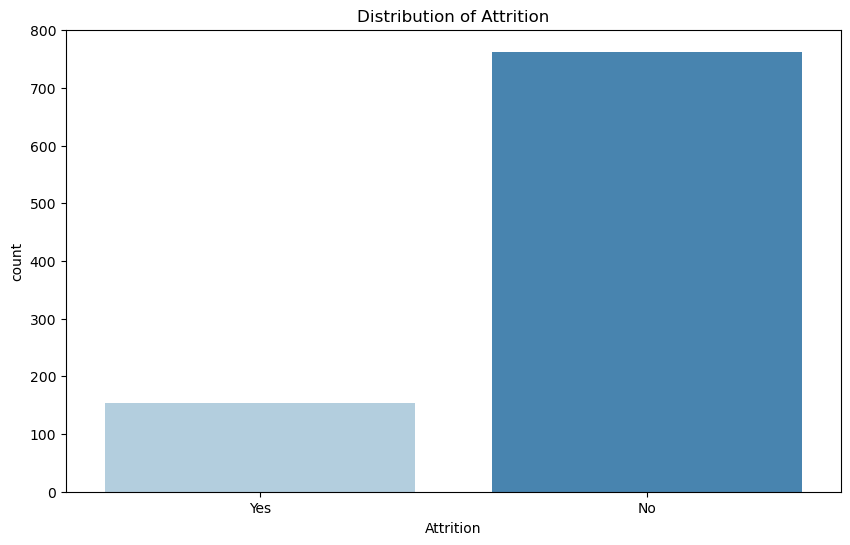

In [9]:
#Distribution of Attrition
plt.figure(figsize = (10,6))
sns.countplot(x='Attrition', data = hr_data, palette='Blues')
plt.title("Distribution of Attrition")

C:\Users\uparn\AppData\Local\Temp\ipykernel_16236\308722324.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(hr_data['Age'], kde=True, palette='Blues')


Text(0.5, 1.0, 'Distribution of Age')

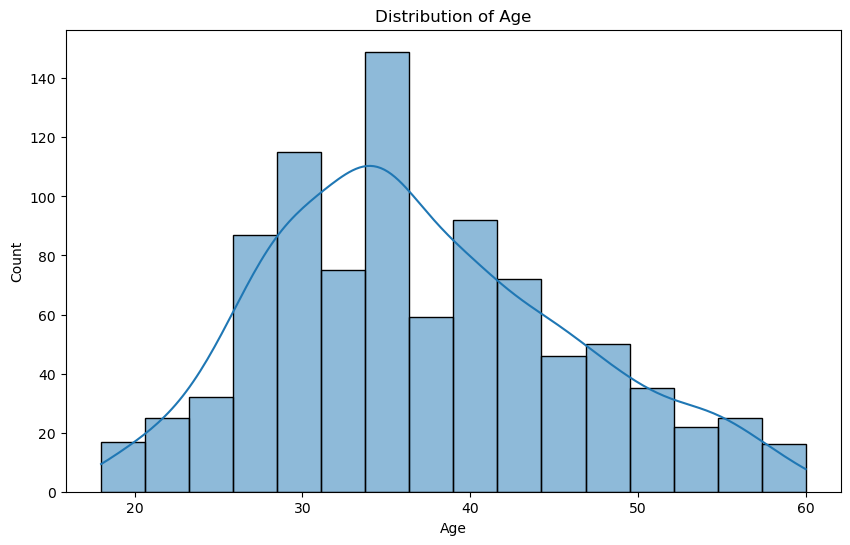

In [10]:
#Distribution of Age
plt.figure(figsize = (10,6))
sns.histplot(hr_data['Age'], kde=True, palette='Blues')
plt.title("Distribution of Age")

Text(0.5, 1.0, 'Monthly Income by Attrition')

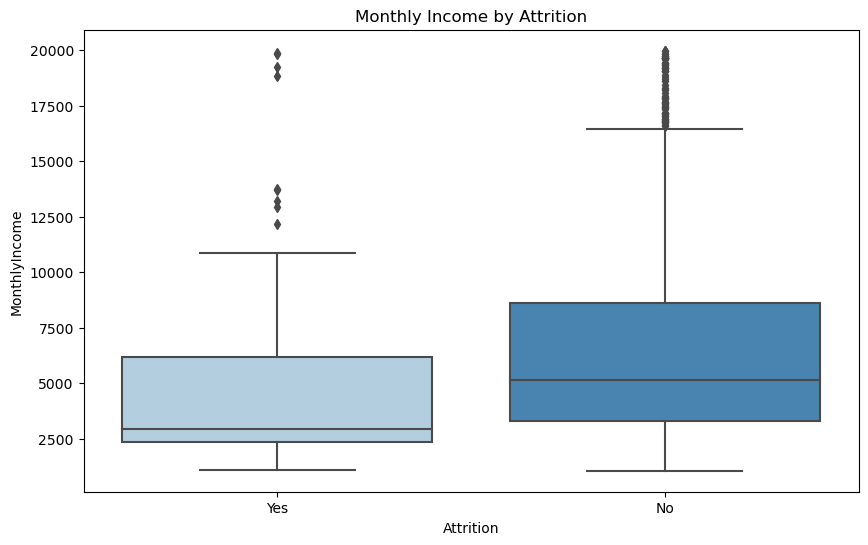

In [11]:
#Box Plot of Monthly Income by Attrition
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=hr_data, palette='Blues')
plt.title("Monthly Income by Attrition")

Text(0.5, 1.0, 'Attrition vs Job Satisfaction')

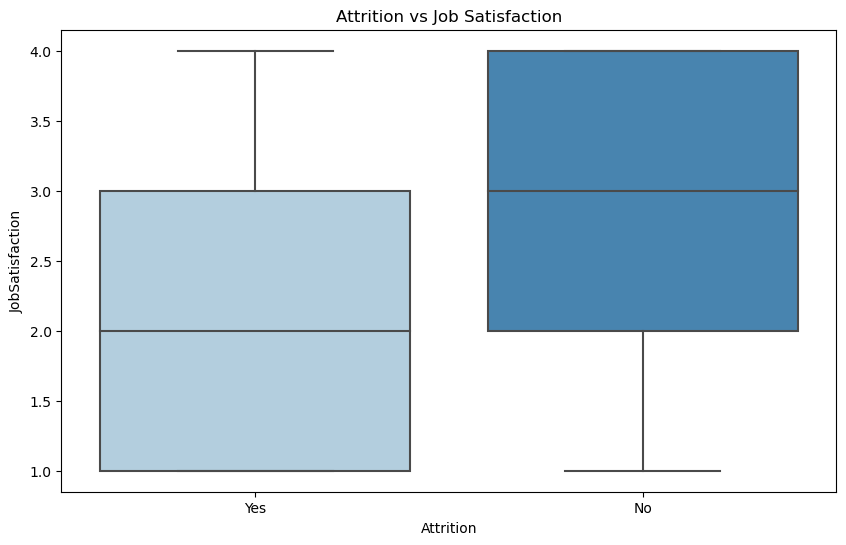

In [12]:
#Box plot for Attrition vs Job Satisfaction
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=hr_data, palette='Blues')
plt.title("Attrition vs Job Satisfaction")

Text(0.5, 1.0, 'Attrition vs Years At Company')

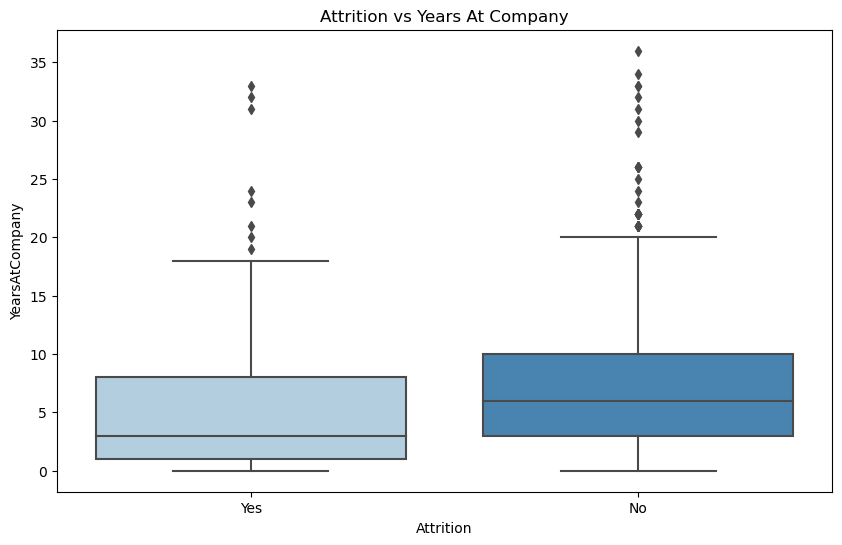

In [13]:
#Attrition vs Years At Company
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=hr_data, palette='Blues')
plt.title("Attrition vs Years At Company")

Text(0.5, 1.0, 'Attrition by Gender')

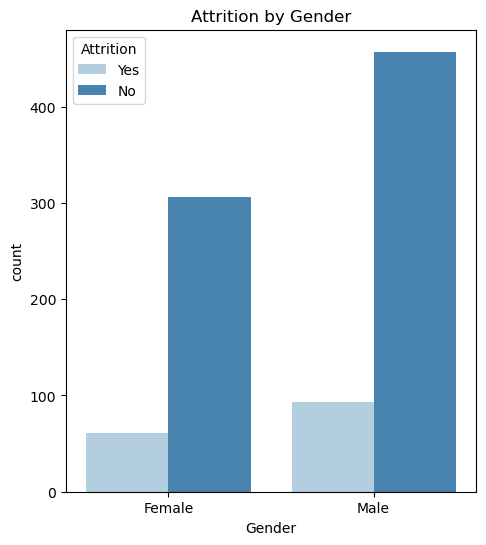

In [14]:
#Count plot for Attrition basis Gender
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='Gender', hue='Attrition', data=hr_data, palette='Blues')
plt.title("Attrition by Gender")

Text(0.5, 1.0, 'Attrition by Marital Status')

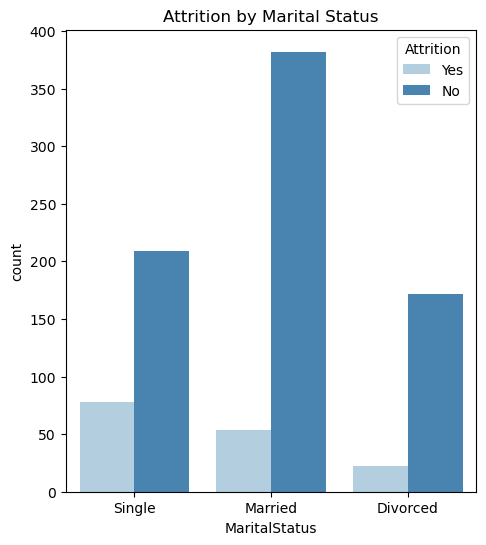

In [15]:
#Count plot for Attrition basis Marital Status
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='MaritalStatus', hue='Attrition', data=hr_data, palette='Blues')
plt.title("Attrition by Marital Status")

Text(0.5, 1.0, 'Attrition by Overtime')

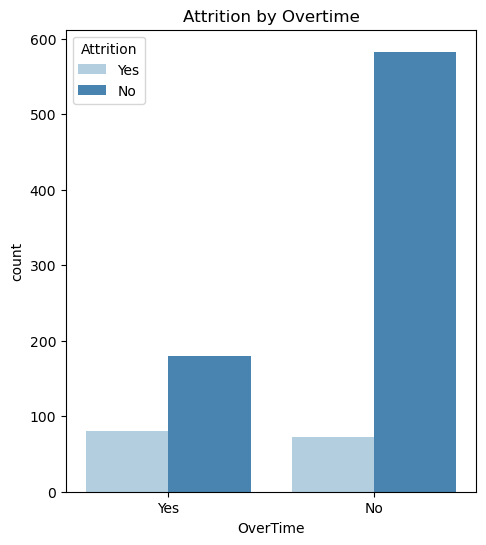

In [16]:
#Count plot for Attrition basis Overtime
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='OverTime', hue='Attrition', data=hr_data, palette='Blues')
plt.title("Attrition by Overtime")

In [17]:
#Encode the target variable
hr_data['Attrition'] = hr_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
#Check for non-numeric columns
hr_data.select_dtypes(include=['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [19]:
#Drop non-numeric column
hr_data = hr_data.drop(columns = ['Over18'])

In [20]:
# Define ordinal and nominal columns
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
                'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
nominal_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                'JobRole', 'MaritalStatus', 'OverTime']

In [21]:
#Apply label encoding to ordinal columns
label_encoders = {col: LabelEncoder() for col in ordinal_cols}
for col in ordinal_cols:
    hr_data[col] = label_encoders[col].fit_transform(hr_data[col])

In [22]:
#Apply One-Hot Encoding to nominal columns
hr_data = pd.get_dummies(hr_data, columns = nominal_cols, drop_first=True)

In [23]:
#Define fetures and target
X = hr_data.drop(columns = ['Attrition', 'EmployeeNumber', 'EmployeeCount', 'StandardHours'])
y = hr_data['Attrition']

In [24]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 42)

In [25]:
#Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
#Check shapes of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((733, 44), (184, 44), (733,), (184,))

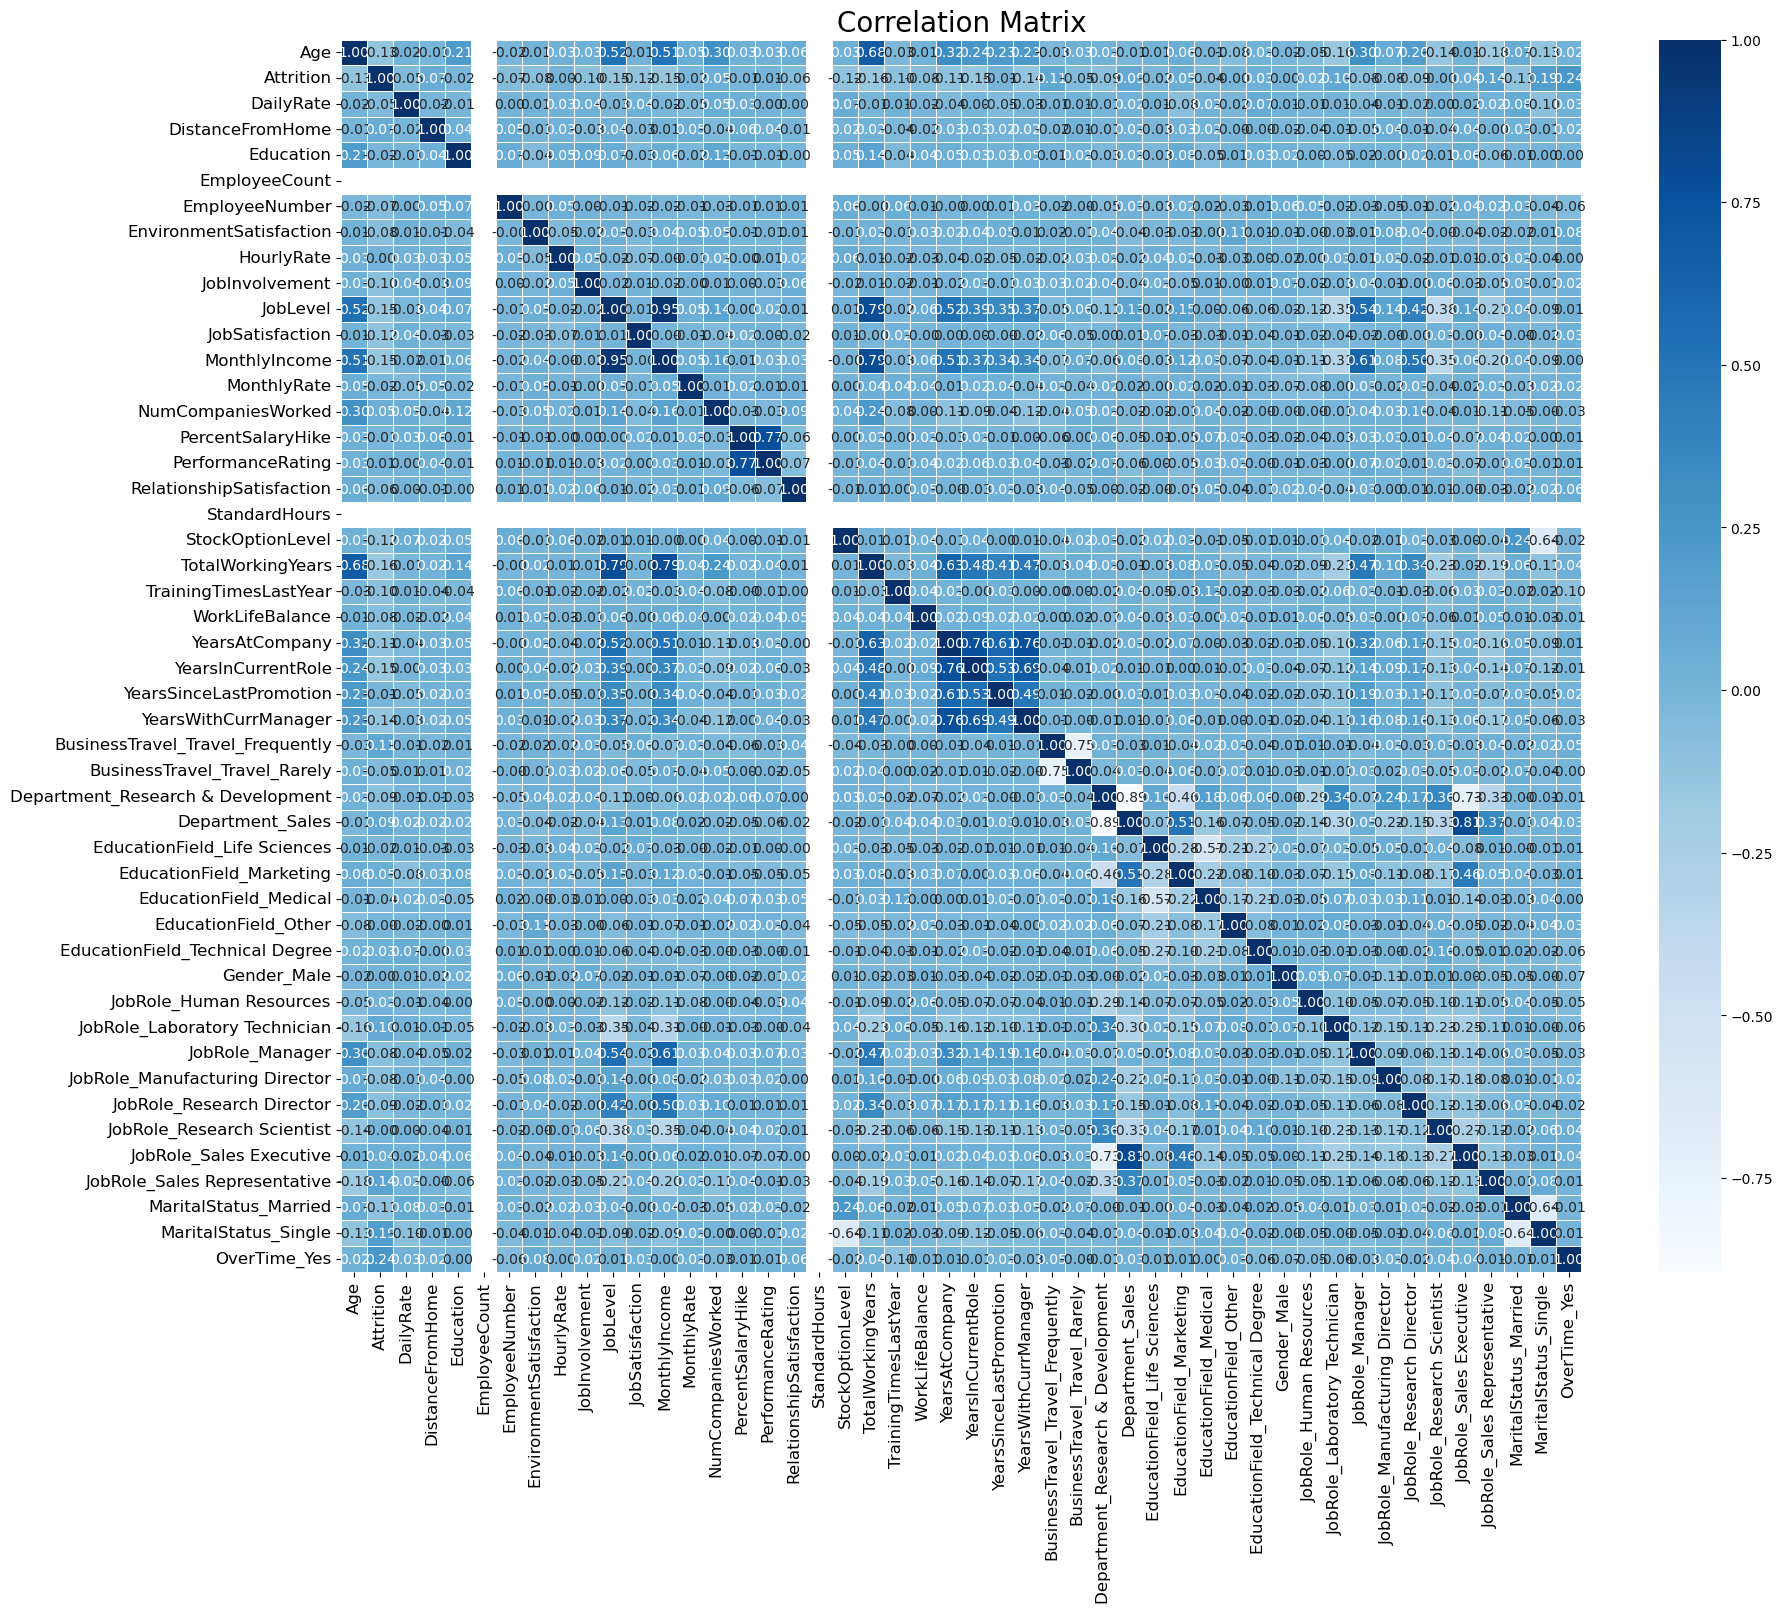

In [27]:
# Correlation Matrix
plt.figure(figsize=(20, 16))
sns.heatmap(hr_data.corr(), cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\uparn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


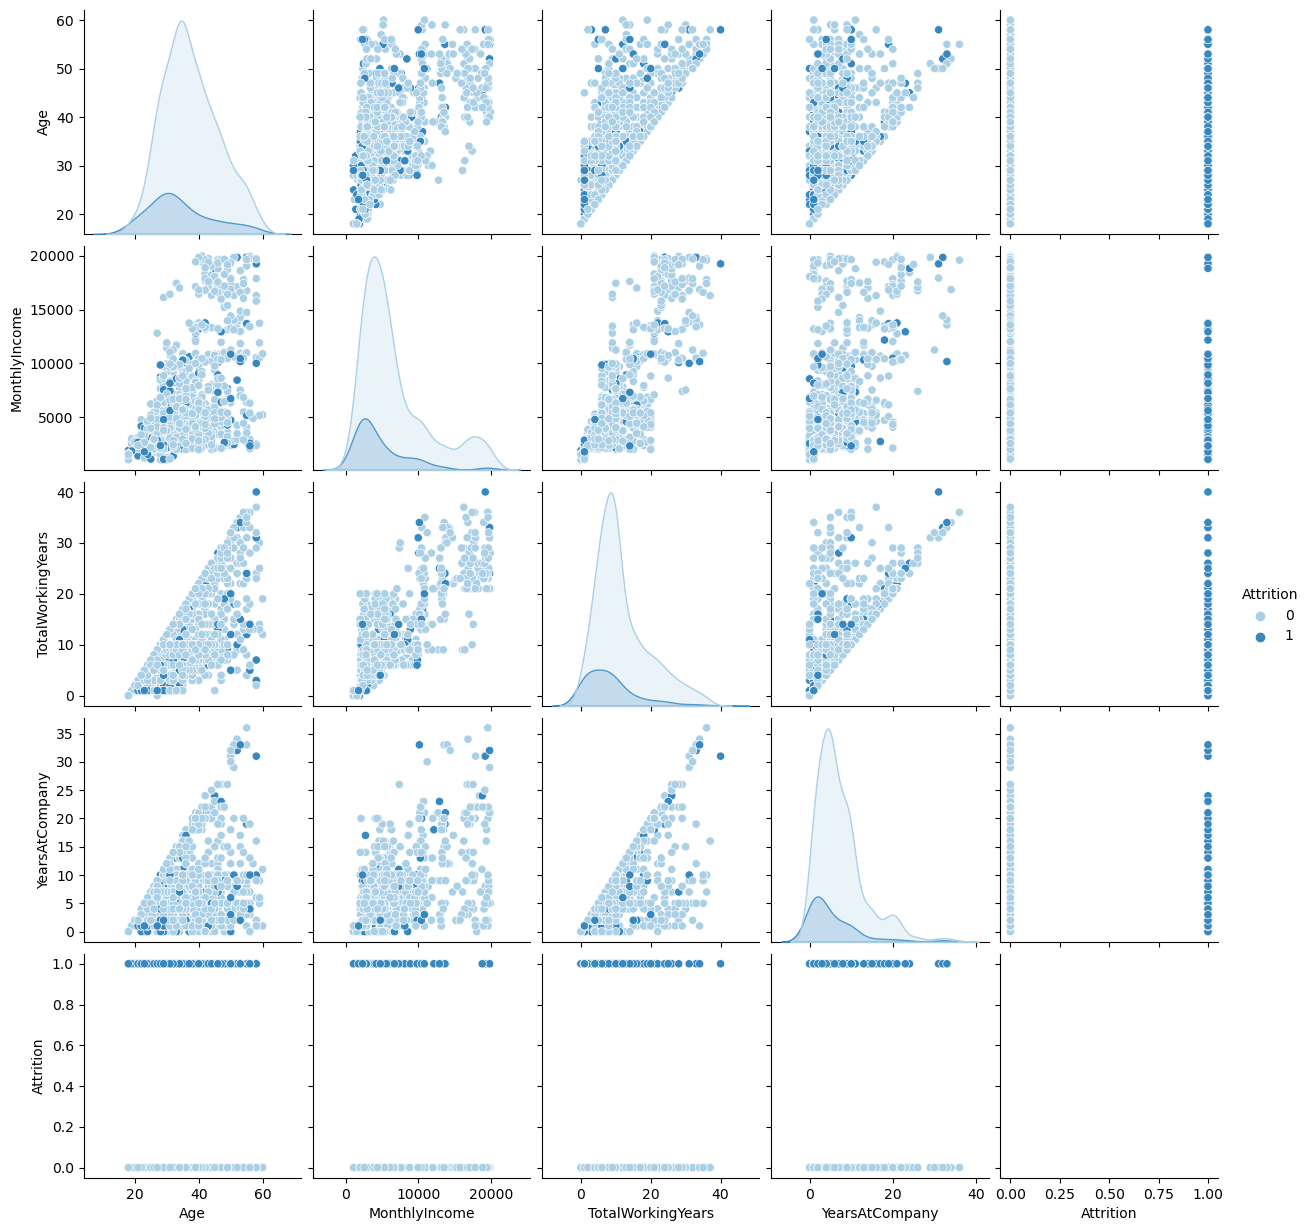

In [28]:
#pair Plot
sns.pairplot(hr_data, vars=['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'Attrition'], hue='Attrition', palette='Blues')
plt.show()

### Training Models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, classification_report

#Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

#Accuracy and Classification Report
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
print(report_logreg)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       152
           1       0.74      0.44      0.55        32

    accuracy                           0.88       184
   macro avg       0.81      0.70      0.74       184
weighted avg       0.86      0.88      0.86       184



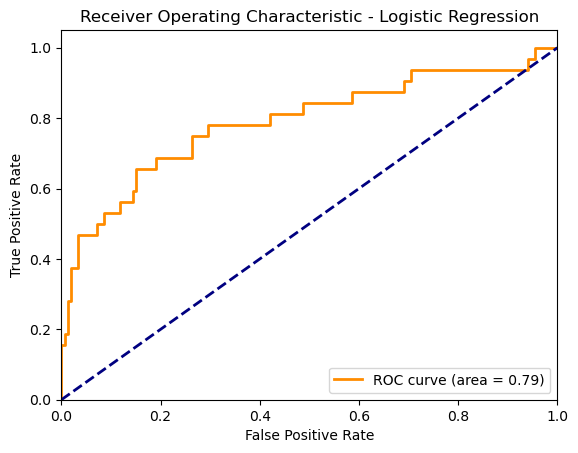

In [30]:
#ROC and AUC
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()
plt.close()

In [31]:
#Decision Tree
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Accuracy and classification report
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       152
           1       0.43      0.47      0.45        32

    accuracy                           0.80       184
   macro avg       0.66      0.67      0.66       184
weighted avg       0.81      0.80      0.80       184



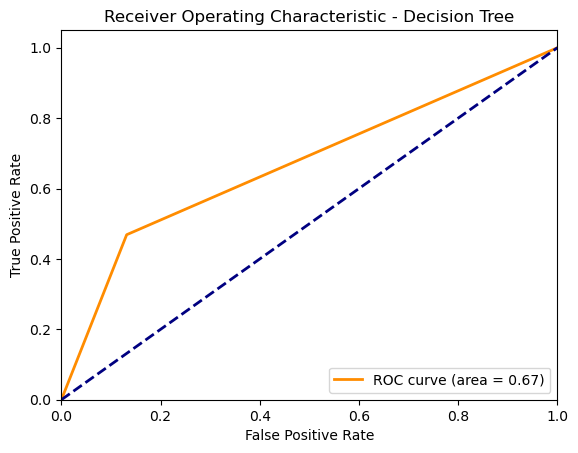

In [32]:
#ROC and AUC 

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()
plt.close()

In [33]:
#Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

#Accuracy and Classification Report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       152
           1       0.60      0.09      0.16        32

    accuracy                           0.83       184
   macro avg       0.72      0.54      0.53       184
weighted avg       0.80      0.83      0.78       184



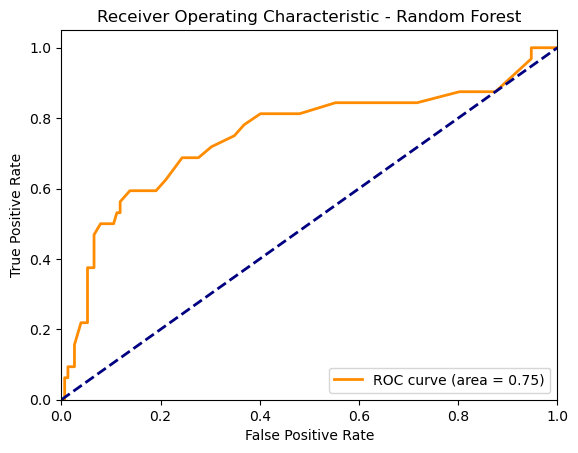

In [34]:
# ROC and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()
plt.close()

In [35]:
#K-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

#Accuracy and Classification Report

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       152
           1       0.67      0.06      0.11        32

    accuracy                           0.83       184
   macro avg       0.75      0.53      0.51       184
weighted avg       0.81      0.83      0.77       184



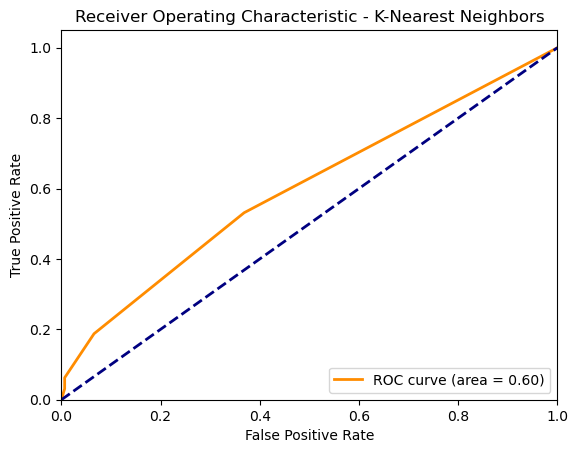

In [36]:
#ROC and AUC

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()
plt.close()

In [37]:
#Gradient Boosting Machine

gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
y_prob_gbm = gbm.predict_proba(X_test)[:, 1]

# Accuracy and classification report
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm)
print(report_gbm)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       152
           1       0.67      0.31      0.43        32

    accuracy                           0.85       184
   macro avg       0.77      0.64      0.67       184
weighted avg       0.83      0.85      0.83       184



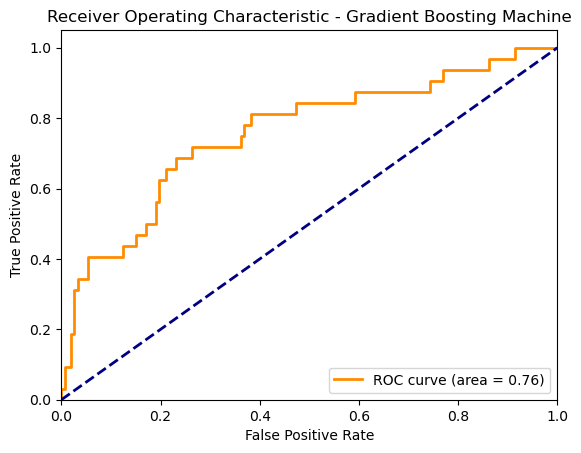

In [38]:
# ROC and AUC
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_prob_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gbm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting Machine')
plt.legend(loc="lower right")
plt.show()
plt.close()

Model Comparison and Selection

Here are the accuracies of the models we trained:

Logistic Regression: 88%

Decision Tree: 80%

Random Forest: 83%

K-Nearest Neighbors: 83%

Gradient Boosting Machine (GBM): 85%

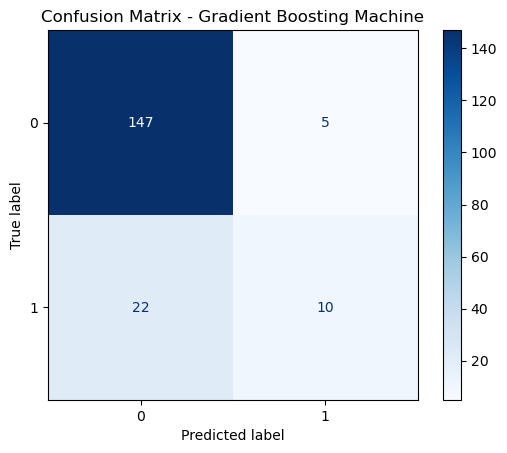

In [39]:
# Confusion Matrix for Gradient Boosting Machine
confusion_gbm = ConfusionMatrixDisplay.from_estimator(gbm, X_test, y_test, cmap='Blues')
confusion_gbm.ax_.set_title("Confusion Matrix - Gradient Boosting Machine")
plt.show()
plt.close()